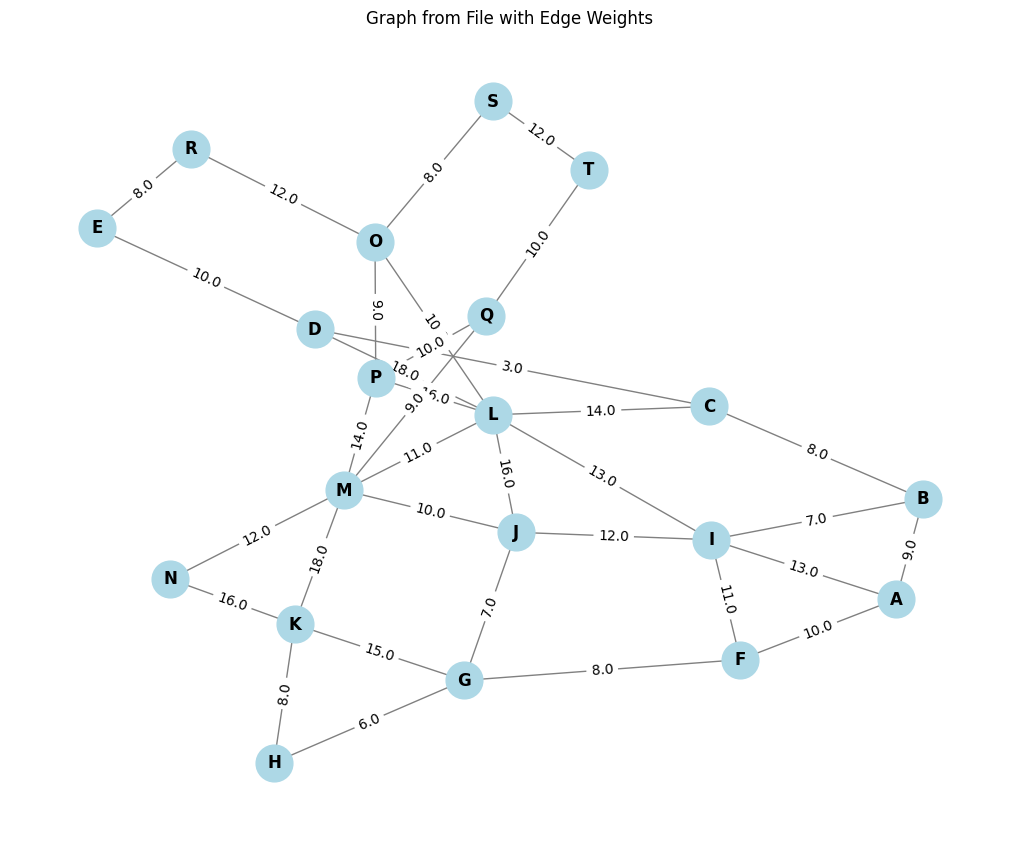

In [1]:
# Exibe o grafo do arquivo graph.txt
from functions import visualizar_grafo
visualizar_grafo("grafo.txt")

In [2]:
from functions import *
np.set_printoptions(threshold=np.inf)

# Utiliza ordem alfabetica para descoberta dos nós
def gulosa(inicial, final, matriz_adj, heuristica):
    descobertos = []
    # Conjunto de vertices que não foram explorados
    abertos = []
    pais = dict()

    # Descobre o vertice inicial e adiciona em abertos
    descobertos.append(inicial)
    abertos.append(inicial)

    if inicial+1 > len(matriz_adj) or final+1 > len(matriz_adj):
        print("Vertice inicial ou final não existe no grafo")
        return []
    while True:
        print("Abertos (vertice: heuristica): ", [f"{int_to_letter(i+1)}: {heuristica[i]}" for i in heuristica if i in abertos])
        # Obtém o aberto de menor heuristica
        v = abertos.pop(obter_indice_de_menor_metrica(abertos, heuristica))
        print("Escolhido: ", int_to_letter(v+1))
        # Obtém os vizinhos do vertice v
        vizinhos = [i for i in obter_vizinhos(v, matriz_adj) if i not in descobertos]
        print("Vizinhos :", list(map(int_to_letter, list(map(lambda x: x+1, vizinhos)))), "\n")
        for vizinho in vizinhos:
            # Descobre cada vizinho e os adiciona na fila para serem explorados
            descobertos.append(vizinho)
            abertos.append(vizinho)
            pais[vizinho] = v
            # Se o vizinho for o vertice final, encerra o loop
            if vizinho == final:
                return descobertos, pais

matriz_adj = gerar_matriz_adjacente("grafo.txt")
heuristica = gerar_heuristicas("heuristica.txt")
inicial, final = letter_to_int("G")-1, letter_to_int("S")-1 # Retorna o número correspondente a ordem alfabética

# Nos exercicios ele não ve os irmãos do vertice final, mas na implementação isso acontece
descobertos, pais = gulosa(inicial, final, matriz_adj, heuristica)

imprimir_resultado(incrementar(descobertos), usarLetras=True)

Abertos (vertice: heuristica):  ['G: 35']
Escolhido:  G
Vizinhos : ['F', 'H', 'J', 'K'] 

Abertos (vertice: heuristica):  ['F: 35', 'H: 40', 'J: 30', 'K: 38']
Escolhido:  J
Vizinhos : ['I', 'L', 'M'] 

Abertos (vertice: heuristica):  ['F: 35', 'H: 40', 'I: 25', 'K: 38', 'L: 14', 'M: 22']
Escolhido:  L
Vizinhos : ['C', 'D', 'O', 'P'] 

Abertos (vertice: heuristica):  ['C: 26', 'D: 28', 'F: 35', 'H: 40', 'I: 25', 'K: 38', 'M: 22', 'O: 6', 'P: 13']
Escolhido:  O
Vizinhos : ['R', 'S'] 

Ordem de descoberta:  ['G', 'F', 'H', 'J', 'K', 'I', 'L', 'M', 'C', 'D', 'O', 'P', 'R', 'S']


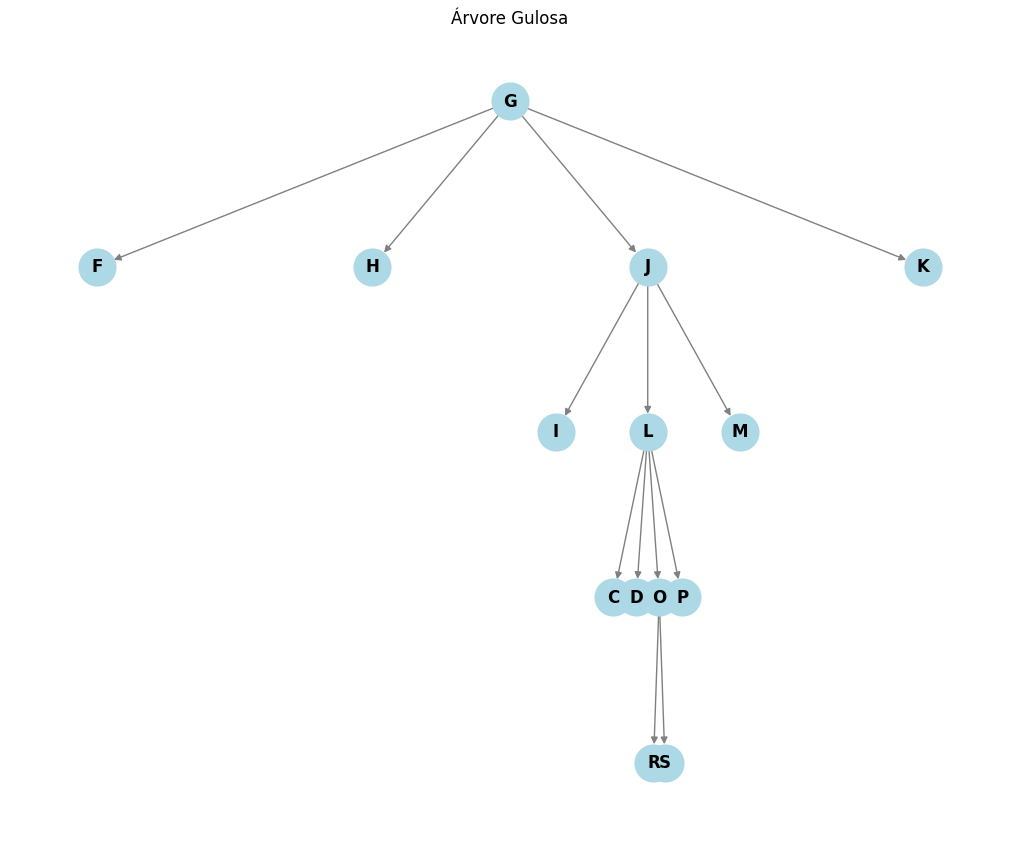

In [3]:
visualizar_arvore_de_pais(incrementar(pais), usarLetras=True, titulo="Árvore Gulosa")